<h1> Importing All the Packages </h1>

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from mnist import MNIST

<h1> Loading the MNIST Dataset </h1>

In [2]:
data_path = 'E:\\Handwritten digit recognition\\MNIST_data'
mnist_data = MNIST(data_path)

mnist_data.train_img_fname = 'train-images.idx3-ubyte'
mnist_data.train_lbl_fname = 'train-labels.idx1-ubyte'
mnist_data.test_img_fname = 't10k-images.idx3-ubyte'
mnist_data.test_lbl_fname = 't10k-labels.idx1-ubyte'

# Loading the training and testing data
X_train, y_train = mnist_data.load_training()
X_test, y_test = mnist_data.load_testing()

# Converting the data into numpy arrays
X_train = np.array(X_train).reshape(-1, 28, 28)
X_test = np.array(X_test).reshape(-1, 28, 28)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Checking the shape of the dataset
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training Labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training Labels shape: (60000,)
Test labels shape: (10000,)


<h1> Reshaping the Dataset </h1>

In [3]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) #28,28 is the pixel size of images and 1 is color channel of the image
X_test = X_test.reshape(X_test.shape[0],28,28,1)

<h1> Visualising the sample images from MNIST dataset </h1>

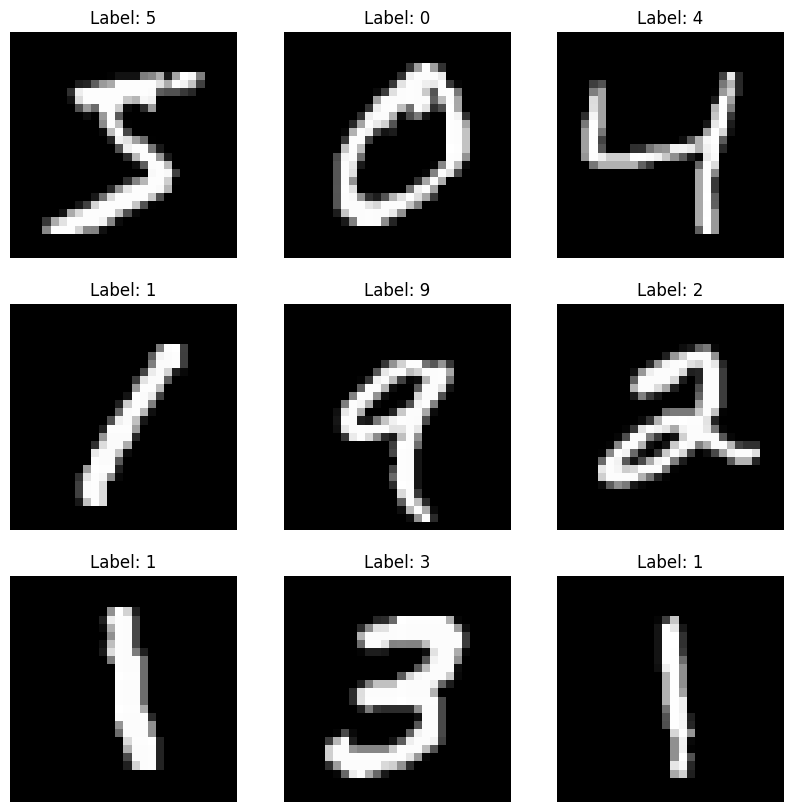

In [4]:
#visualising few images before pre-processing
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

<h1> Pre-processing the Data (Normalisation) </h1>

In [5]:
#Normalising the images i.e scaling pixel values to [0,1] range.
X_train = X_train / 255.0
X_test = X_test / 255.0


#confirmation
print(f"Pixel Value range after normalising: {X_train.min()} to {X_train.max()}")

Pixel Value range after normalising: 0.0 to 1.0


<h1> Visualising the Data after pre-processing </h1>

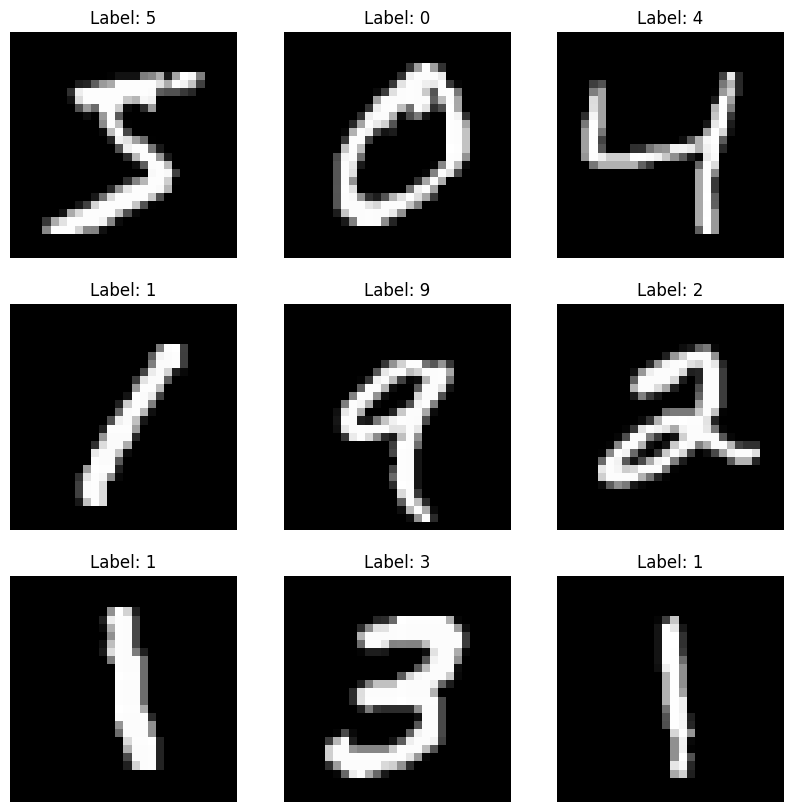

In [6]:
#Visualising few images after normalising

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

<h1>Building the Neural Network Model using Tensorflow </h1>

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  #Layer for extracting features from the input image. 
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),  #Layer for downsampling the input to reduce computation load
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  #Layer that learns more complex features with 64 filters, after downsampling.
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)), #Another layer for downsampling after learning more complex features.
    tf.keras.layers.Flatten(), #Flattening the output of the convolutional layers to feed it to the dense layers
    tf.keras.layers.Dense(256, activation='relu'),  #Layer that learns patterns from the flattened features, adding more abstraction.
    tf.keras.layers.Dropout(0.5),  #Layer that helps in preventing overfitting by randomly turning off 50% of the neuron
    tf.keras.layers.Dense(10, activation='softmax') #Output layer that gives the probability of the input image belonging to each class.
])




model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

<h1>Training the model</h1>
<p> The model will be trained on the pre-processed data and store the training history to visualise accuracy and loss later</p>

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)
#Trains the model on on training data and validates using testing data. The model is trained for 20 epochs.

Epoch 1/20


1875/1875 [==============================] - 27s 13ms/step - loss: 0.1671 - accuracy: 0.9485 - val_loss: 0.0461 - val_accuracy: 0.9850
Epoch 2/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.0291 - val_accuracy: 0.9907
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.0259 - val_accuracy: 0.9911
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0261 - val_accuracy: 0.9924
Epoch 5/20
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0226 - val_accuracy: 0.9925
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0216 - val_accuracy: 0.9933
Epoch 7/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0203 - accuracy: 0.9938 - val_loss: 0.0216

<h1> Saving the model </h1>

In [9]:
# Saves the model 
model.save(r'E:\Handwritten digit recognition\digit_recognition_model.h5')

C:\Users\chall\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h1> Evaluating the Model </h1>

In [10]:
#Evaluating on test data

val_loss, val_acc = model.evaluate(X_test, y_test)

print(f"Validation loss: {val_loss}")
print(f"Validation Accuracy {val_acc}")

313/313 [==============================] - 2s 6ms/step - loss: 0.0373 - accuracy: 0.9937
Validation loss: 0.03728631138801575
Validation Accuracy 0.9937000274658203


<h1> Visualising accuracy and loss over Epochs </h1>

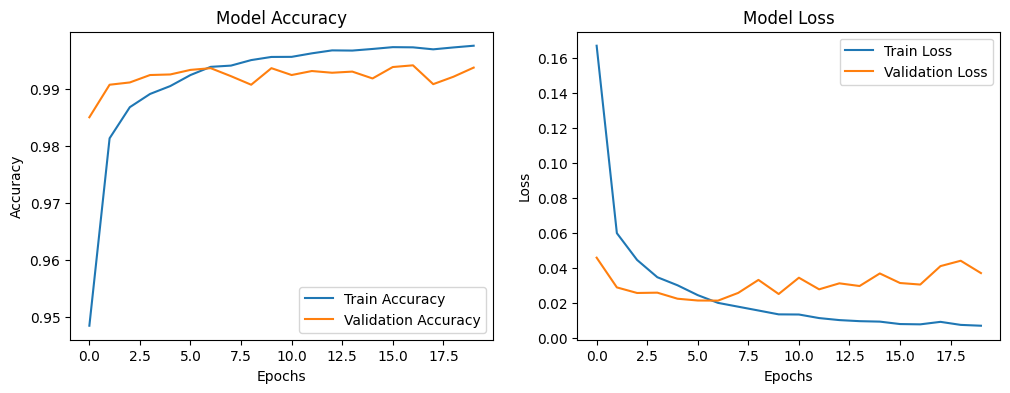

In [11]:
#Plotting training and validation accuracy

plt.figure(figsize=(12,4))

#Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label=['Train Accuracy'])
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label=['Train Loss'])
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h1> Confusion Matrix </h1>
<p> This matrix visualises the confusion matrix to better understand the model's perfomance on each digit </p>

313/313 [==============================] - 1s 3ms/step


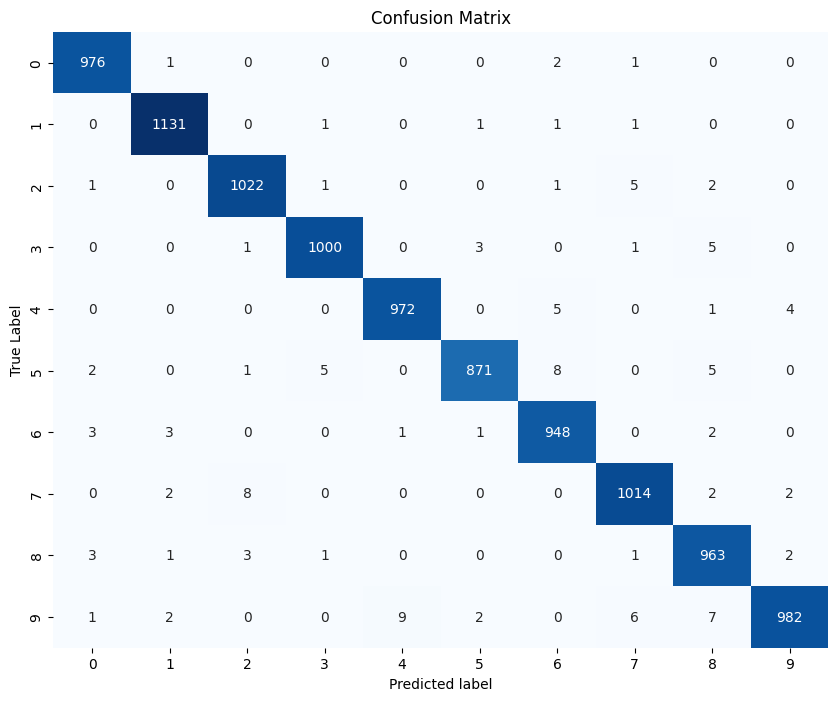

In [27]:
#Predicting the classes for test data

y_pred = np.argmax(model.predict(X_test), axis = -1)

#Computing the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True Label')
plt.show()

<h1> This is the Model Training part </h1>